Key: 

*   **Bold (plain)** = No Choice, Just Run
*   *** Bold (+ asterisks) *** = Make A Choice Within
*   *Italics* = Choose One

# > **Import all Necessary Libraries**

In [42]:
import pandas as pd
import io

In [43]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, KFold, GridSearchCV

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.preprocessing import normalize

In [46]:
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# > ***Load Dataset, Calculate Distributions & Encode Categorical Columns*** 

***Import Pandas, read "crimeNoError" into a Pandas dataframe***

In [48]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving crimeNoErrorEqual_3.csv to crimeNoErrorEqual_3.csv


In [49]:
# Store dataset as a Pandas data frame
df = pd.read_csv(io.BytesIO(uploaded['crimeNoErrorEqual_3.csv']))

In [50]:
# Display the data frame
print(df)

        OFFENSE_GROUP DISTRICT  YEAR  MONTH        DAY  HOUR
0      Drug Violation       B2  2017      7  Wednesday    17
1      Drug Violation       D4  2017      7  Wednesday    15
2      Drug Violation       D4  2017      7  Wednesday    13
3      Drug Violation       D4  2017      7  Wednesday    13
4      Drug Violation       D4  2017      7  Wednesday    13
...               ...      ...   ...    ...        ...   ...
34057           Towed       C6  2015      6     Monday     9
34058           Towed       A1  2015      6     Monday    11
34059           Towed       C6  2015      6     Monday     8
34060           Towed       D4  2015      6     Monday     7
34061           Towed       B2  2015      6     Monday     1

[34062 rows x 6 columns]


***Count occurence of each instance in each feature for the whole dataframe***

In [51]:
# Loop through each column
i=0
while i<=5:
  print(df.groupby(df.columns[i]).count())
  i=i+1

                                 DISTRICT   YEAR  MONTH    DAY   HOUR
OFFENSE_GROUP                                                        
Drug Violation                      11354  11354  11354  11354  11354
Motor Vehicle Accident Response     11354  11354  11354  11354  11354
Towed                               11354  11354  11354  11354  11354
          OFFENSE_GROUP  YEAR  MONTH   DAY  HOUR
DISTRICT                                        
A1                 3603  3603   3603  3603  3603
A15                 858   858    858   858   858
A7                 1662  1662   1662  1662  1662
B2                 4538  4538   4538  4538  4538
B3                 2851  2851   2851  2851  2851
C11                4536  4536   4536  4536  4536
C6                 3314  3314   3314  3314  3314
D14                2797  2797   2797  2797  2797
D4                 4642  4642   4642  4642  4642
E13                2259  2259   2259  2259  2259
E18                1599  1599   1599  1599  1599
E5           

***Count occurence of each instance in each feature for this class only (Drug Violation)***

In [52]:
# Create a separate data frame for this class only
df0 = df.copy()
df0 = df0.groupby('OFFENSE_GROUP')
df0F = df0.get_group('Drug Violation')

# Loop through each column
i=1
while i<=5:
  print(df0F.groupby(df0F.columns[i]).count())
  i=i+1

          OFFENSE_GROUP  YEAR  MONTH   DAY  HOUR
DISTRICT                                        
A1                 1449  1449   1449  1449  1449
A15                 215   215    215   215   215
A7                  640   640    640   640   640
B2                 1482  1482   1482  1482  1482
B3                 1025  1025   1025  1025  1025
C11                1702  1702   1702  1702  1702
C6                 1154  1154   1154  1154  1154
D14                 427   427    427   427   427
D4                 1379  1379   1379  1379  1379
E13                 762   762    762   762   762
E18                 603   603    603   603   603
E5                  516   516    516   516   516
      OFFENSE_GROUP  DISTRICT  MONTH   DAY  HOUR
YEAR                                            
2015           3291      3291   3291  3291  3291
2016           5229      5229   5229  5229  5229
2017           2796      2796   2796  2796  2796
2018             38        38     38    38    38
       OFFENSE_GROUP

***Count occurence of each instance in each feature for this class only (Motor Vehicle Accident Response)***

In [53]:
# Create a separate data frame for this class only
df1 = df.copy()
df1 = df1.groupby('OFFENSE_GROUP')
df1F = df1.get_group('Motor Vehicle Accident Response')

# Loop through each column
i=1
while i<=5:
  print(df1F.groupby(df1F.columns[i]).count())
  i=i+1

          OFFENSE_GROUP  YEAR  MONTH   DAY  HOUR
DISTRICT                                        
A1                  830   830    830   830   830
A15                 297   297    297   297   297
A7                  466   466    466   466   466
B2                 2097  2097   2097  2097  2097
B3                 1183  1183   1183  1183  1183
C11                1643  1643   1643  1643  1643
C6                  795   795    795   795   795
D14                 867   867    867   867   867
D4                 1254  1254   1254  1254  1254
E13                 649   649    649   649   649
E18                 691   691    691   691   691
E5                  582   582    582   582   582
      OFFENSE_GROUP  DISTRICT  MONTH   DAY  HOUR
YEAR                                            
2015           5806      5806   5806  5806  5806
2016           5548      5548   5548  5548  5548
       OFFENSE_GROUP  DISTRICT  YEAR   DAY  HOUR
MONTH                                           
1                838

***Count occurence of each instance in each feature for this class only (Towed)***

In [54]:
# Create a separate data frame for this class only
df2 = df.copy()
df2 = df2.groupby('OFFENSE_GROUP')
df2F = df2.get_group('Towed')

# Loop through each column
i=1
while i<=5:
  print(df2F.groupby(df2F.columns[i]).count())
  i=i+1

          OFFENSE_GROUP  YEAR  MONTH   DAY  HOUR
DISTRICT                                        
A1                 1324  1324   1324  1324  1324
A15                 346   346    346   346   346
A7                  556   556    556   556   556
B2                  959   959    959   959   959
B3                  643   643    643   643   643
C11                1191  1191   1191  1191  1191
C6                 1365  1365   1365  1365  1365
D14                1503  1503   1503  1503  1503
D4                 2009  2009   2009  2009  2009
E13                 848   848    848   848   848
E18                 305   305    305   305   305
E5                  305   305    305   305   305
      OFFENSE_GROUP  DISTRICT  MONTH   DAY  HOUR
YEAR                                            
2015           1557      1557   1557  1557  1557
2016           3206      3206   3206  3206  3206
2017           3926      3926   3926  3926  3926
2018           2665      2665   2665  2665  2665
       OFFENSE_GROUP

***Encode categorical columns (OFFENSE_GROUP, DISTRICT, DAY)***

In [55]:
df.OFFENSE_GROUP = df.OFFENSE_GROUP.astype('category').cat.codes
df.DISTRICT = df.DISTRICT.astype('category').cat.codes
df.DAY = df.DAY.astype('category').cat.codes

In [56]:
# Display the upper 5 rows of data to show how the encoding looks
df.head()

,OFFENSE_GROUP,DISTRICT,YEAR,MONTH,DAY,HOUR
0,0,3,2017,7,6,17
1,0,8,2017,7,6,15
2,0,8,2017,7,6,13
3,0,8,2017,7,6,13
4,0,8,2017,7,6,13


***Count occurence of each instance in each feature for the whole dataset (Encoded)***

In [57]:
# loop through each column
i=1
while i<=5:
  print(df.groupby(df.columns[i]).count())
  i=i+1

          OFFENSE_GROUP  YEAR  MONTH   DAY  HOUR
DISTRICT                                        
0                  3603  3603   3603  3603  3603
1                   858   858    858   858   858
2                  1662  1662   1662  1662  1662
3                  4538  4538   4538  4538  4538
4                  2851  2851   2851  2851  2851
5                  4536  4536   4536  4536  4536
6                  3314  3314   3314  3314  3314
7                  2797  2797   2797  2797  2797
8                  4642  4642   4642  4642  4642
9                  2259  2259   2259  2259  2259
10                 1599  1599   1599  1599  1599
11                 1403  1403   1403  1403  1403
      OFFENSE_GROUP  DISTRICT  MONTH    DAY   HOUR
YEAR                                              
2015          10654     10654  10654  10654  10654
2016          13983     13983  13983  13983  13983
2017           6722      6722   6722   6722   6722
2018           2703      2703   2703   2703   2703
       O

# > **Set Label Set & Feature Sets**

***Set features as 'X' and labels as 'y'***

In [58]:
X = df.loc[:, ["DISTRICT", "YEAR", "MONTH", "DAY", "HOUR"]].values
y = df.loc[:, "OFFENSE_GROUP"].values

In [59]:
X

array([[   3, 2017,    7,    6,   17],
       [   8, 2017,    7,    6,   15],
       [   8, 2017,    7,    6,   13],
       ...,
       [   6, 2015,    6,    1,    8],
       [   8, 2015,    6,    1,    7],
       [   3, 2015,    6,    1,    1]])

In [60]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int8)

# > *** Choose A Split ***

### >> *70/30 split*





In [ ]:
# Set as a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, shuffle=True)

### >> *80/20 split*

In [61]:
# Set as an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

### >> *90/10 split*

In [ ]:
# Set as a 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, shuffle=True)

# > *** Choose A Method ***

## >> * *Choose A Model* * (Standard run)

### >>> *Naive Bayes Classifier*

***Fit the model with the training data***

In [21]:
# Create a model variable
model = GaussianNB()

In [22]:
# Fit the model to the training data
model.fit(X_train, y_train)

GaussianNB()

In [23]:
# Predict on the test feature set
y_pred = model.predict(X_test)

In [24]:
# Predict probabilities of test set
y_pred_proba = model.predict_proba(X_test)

# Normalise predicted probabilities
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

### >>> *Decision Tree Classifier*

In [62]:
# Create a model variable
model = DecisionTreeClassifier()

In [63]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
# Predict on the test feature set
y_pred = model.predict(X_test)

In [65]:
# Predict probabilities of test set
y_pred_proba = model.predict_proba(X_test)

# Normalise predicted probabilities
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

### >>> *Random Forest Classifier*

In [32]:
# Create a model variable
model = RandomForestClassifier()

In [33]:
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Predict on the test feature set
y_pred = model.predict(X_test)

In [35]:
# Predict probabilities of test set
y_pred_proba = model.predict_proba(X_test)

# Normalise predicted probabilities
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

### >>> *K-Nearest Neighbours Classifier*

In [37]:
# Create a model variable
model = KNeighborsClassifier()

In [38]:
# Fit the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
# Predict on the test feature set
y_pred = model.predict(X_test)

In [40]:
# Predict probabilities of test set
y_pred_proba = model.predict_proba(X_test)

# Normalise predicted probabilities
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

### >>> **Model Performance**

***Use accuracy, balanced accuracy, precision, recall and F1 score as metrics. Also create Confusion Matrix***

In [66]:
# Accuracy (TP+TN/TP+FP+TN+FN, correctly classified instances out of all predictions)
print('Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred))

# Balanced accuracy ((Sensitivity+Specificity)/2, the average accuracy obtained from both the minority and majority classes, arithmetic mean of 
# sensitivity and specificity)
print('Balanced accuracy: ', balanced_accuracy_score(y_true=y_test, y_pred=y_pred))

# Precision (TP/TP+FP, out of how many positive predictions were true)
print('Precision: ', precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))

# Recall (TP/TP+FN, number of correct positive predictions out of true-positive and false-negative, aka. TP Rate)
print('Recall: ', recall_score(y_true=y_test, y_pred=y_pred, average = 'macro'))

# F1 score (2*(Precision*Recall/Precision+Recall), harmonic mean of precision and recall)
print('F1 score: ', f1_score(y_true=y_test, y_pred=y_pred, average = 'macro'))

# ROC AUC score (TP Rate vs FP Rate, area under the curve, the curve is probability, AUC is the degree or measure of separability)
print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba_norm, multi_class='ovr'))

Accuracy:  0.6581535300161456
Balanced accuracy:  0.6577766243100627
Precision:  0.6627418556213789
Recall:  0.6577766243100627
F1 score:  0.6586275174124082
ROC AUC score: 0.7648340617445836


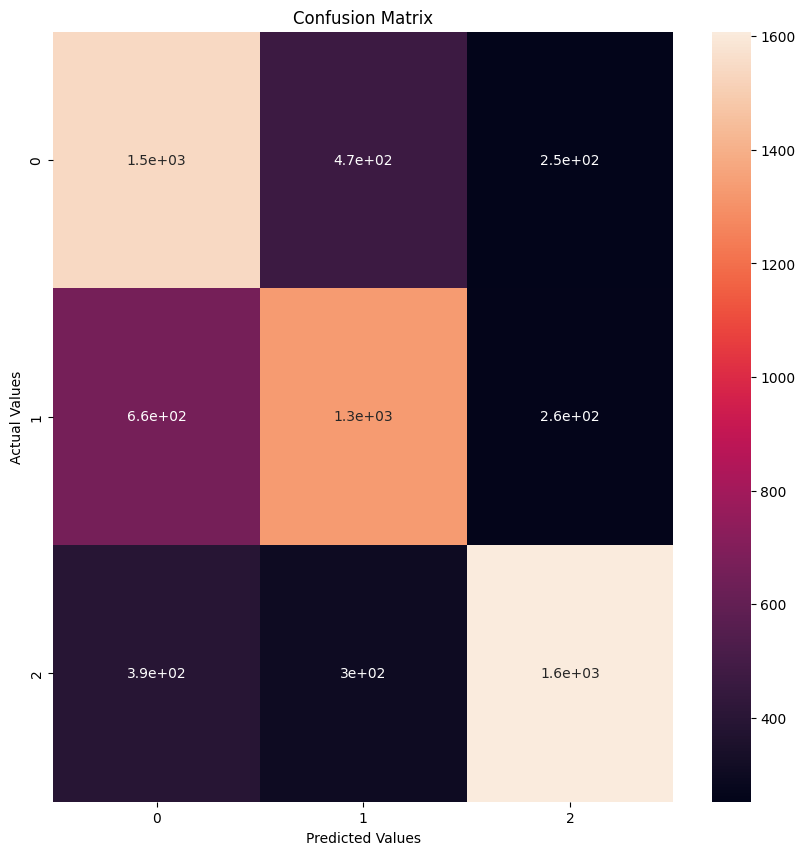

In [67]:
# Confusion Matrix set-up
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [0, 1, 2],
                     columns = [0, 1, 2])

# Plot the Confusion Matrix
plt.figure(figsize=(10,10)) # Set matrix size
sns.heatmap(cm_df, annot=True) # Use seaborn to make coloured heatmap
plt.title('Confusion Matrix') # Provide a title
plt.ylabel('Actual Values') # Label columns
plt.xlabel('Predicted Values') # Label rows
plt.show()

## >> * *Choose A Model* * (5-Fold Cross-Validation run)

### >>> *Naive Bayes Classifier*

In [27]:
# Instantiate the model
model = GaussianNB()

In [28]:
# Set up the K-fold cross-validation, alter value of 'k' for diffreent number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [29]:
# Initialize empty lists to store metrics for each fold
confusion_matrices = []
accuracies = []
balanced_accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

In [30]:
# Iterate over each fold and get the predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)
    
    # Calculate and append the metrics for this fold
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba_norm, multi_class='ovr'))

### >>> *Decision Tree Classifier*

In [44]:
# Instantiate the model
model = DecisionTreeClassifier()

In [45]:
# Set up the K-fold cross-validation, alter value of 'k' for diffreent number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [46]:
# Initialise empty lists to store metrics for each fold
confusion_matrices = []
accuracies = []
balanced_accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

In [47]:
# Iterate over each fold and get the predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)
    
    # Calculate and append the metrics for this fold
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba_norm, multi_class='ovr'))

### >>> *Random Forest Classifier*

In [61]:
# Instantiate the model
model = RandomForestClassifier()

In [62]:
# Set up the K-fold cross-validation, alter value of 'k' for diffreent number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [63]:
# Initialise empty lists to store metrics for each fold
confusion_matrices = []
accuracies = []
balanced_accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

In [64]:
# Iterate over each fold and get the predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)
    
    # Calculate and append the metrics for this fold
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba_norm, multi_class='ovr'))

### >>> *K-Nearest Neighbours Classifier*

In [78]:
# Instantiate the model
model = KNeighborsClassifier()

In [79]:
# Set up the K-fold cross-validation, alter value of 'k' for diffreent number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [80]:
# Initialise empty lists to store metrics for each fold
confusion_matrices = []
accuracies = []
balanced_accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

In [81]:
# Iterate over each fold and get the predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)
    
    # Calculate and append the metrics for this fold
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba_norm, multi_class='ovr'))

### >>> **Model Performance**

Fold 1
Confusion matrix:


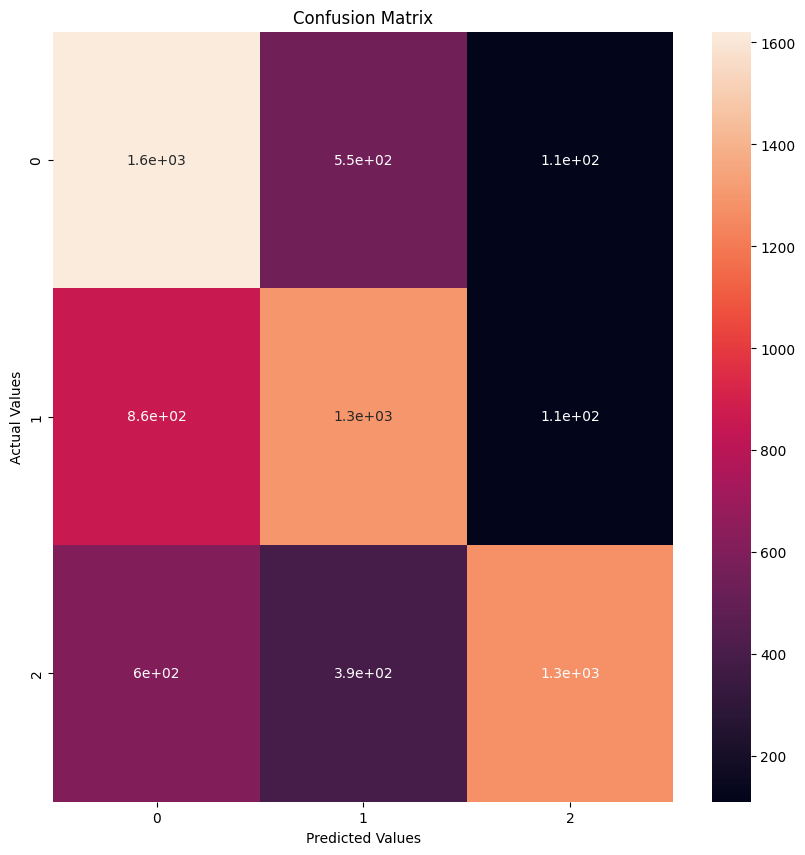

Accuracy: 0.6155878467635403
Balanced accuracy: 0.6154282744919407
Precision: 0.6527157803815161
Recall: 0.6154282744919407
F1 score: 0.6195724327155921
ROC AUC score: 0.791564280780789

Fold 2
Confusion matrix:


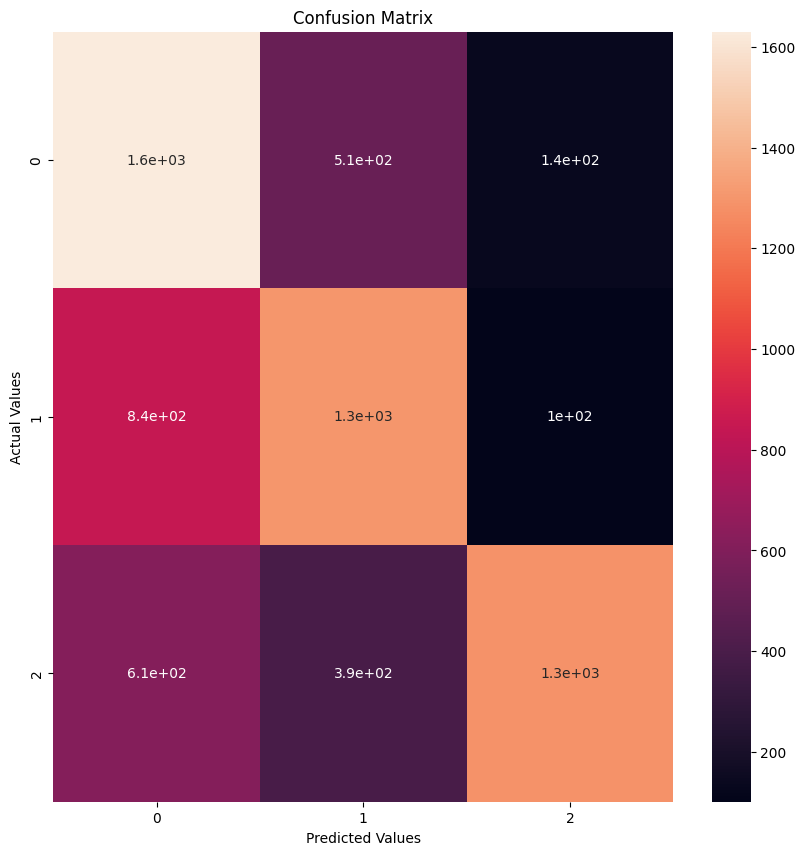

Accuracy: 0.6194040804344635
Balanced accuracy: 0.6193797331539098
Precision: 0.6545949019132996
Recall: 0.6193797331539098
F1 score: 0.6227834287068164
ROC AUC score: 0.7959051893204664

Fold 3
Confusion matrix:


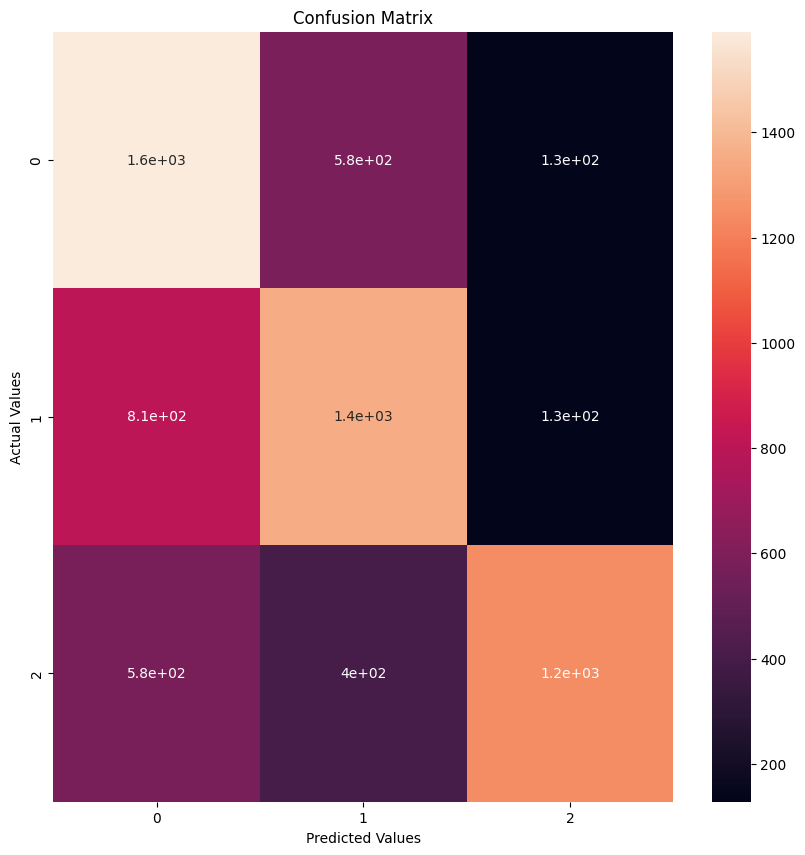

Accuracy: 0.6145038167938931
Balanced accuracy: 0.6138061350266767
Precision: 0.6473480016693671
Recall: 0.6138061350266767
F1 score: 0.618511623566625
ROC AUC score: 0.7895374462973613

Fold 4
Confusion matrix:


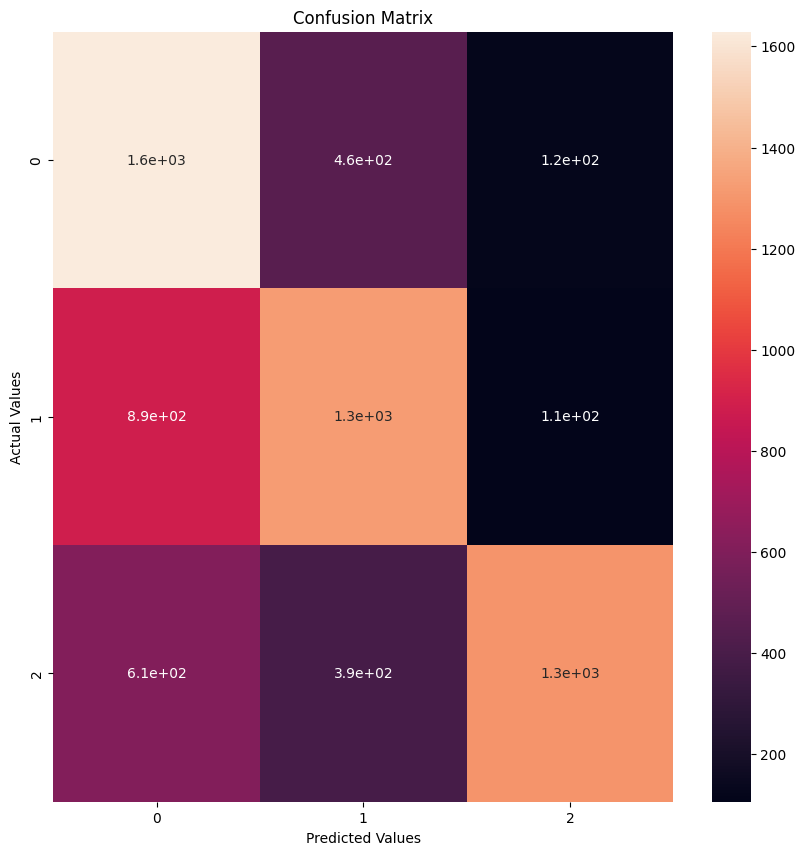

Accuracy: 0.6225778038755138
Balanced accuracy: 0.6242198754734418
Precision: 0.6606641412101834
Recall: 0.6242198754734418
F1 score: 0.6261460746628876
ROC AUC score: 0.79302159239949

Fold 5
Confusion matrix:


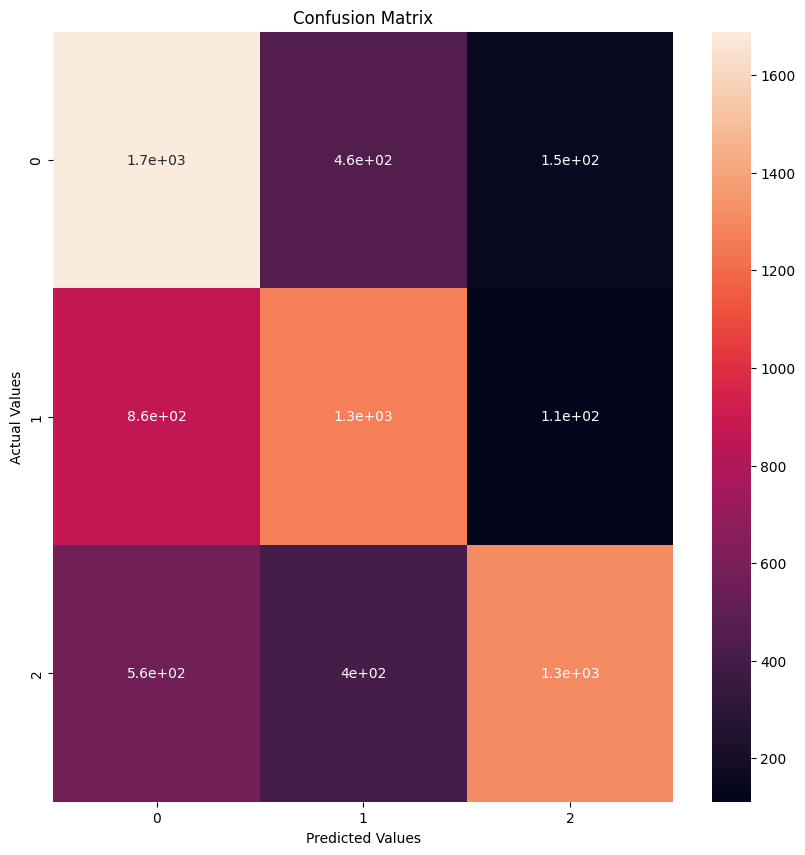

Accuracy: 0.6266881972988844
Balanced accuracy: 0.6261410984942453
Precision: 0.6580095609936457
Recall: 0.6261410984942453
F1 score: 0.6290668636005448
ROC AUC score: 0.7962176386640462

Average Results:
Average confusion matrix: 


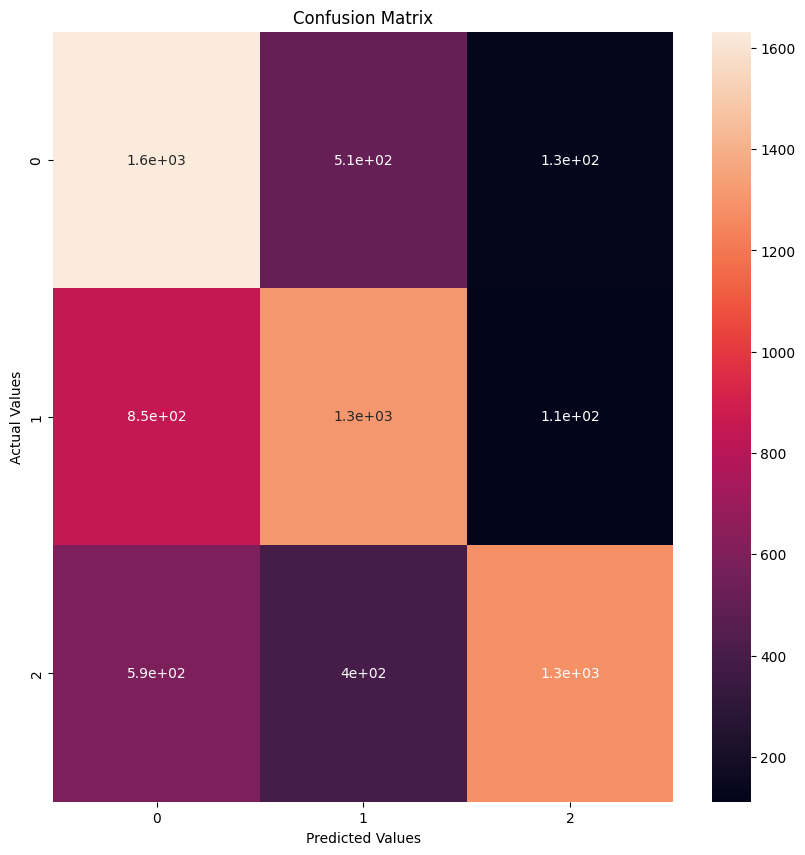


Average Accuracy:  0.619752349033259
Average balanced accuracy:  0.6197950233280428
Average Precision:  0.6546664772336024
Average Recall:  0.6197950233280428
Average F1 score:  0.6232160846504932
Average ROC AUC score:  0.7932492294924305


In [82]:
# Print the metrics for each fold
for i in range(k):
    print(f"Fold {i+1}")

    # Confusion Matrix set-up
    print("Confusion matrix:")
    cm=(confusion_matrices[i])
    cm_df = pd.DataFrame(cm,
                     index = [0, 1, 2],
                     columns = [0, 1, 2])

    # Plot the Confusion Matrix
    plt.figure(figsize=(10,10)) # Set matrix size
    sns.heatmap(cm_df, annot=True) # Use seaborn to make coloured heatmap
    plt.title('Confusion Matrix') # Provide a title
    plt.ylabel('Actual Values') # Label columns
    plt.xlabel('Predicted Values') # Label rows
    plt.show()

    print("Accuracy:", accuracies[i])
    print("Balanced accuracy:", balanced_accuracies[i])
    print("Precision:", precisions[i])
    print("Recall:", recalls[i])
    print("F1 score:", f1_scores[i])
    print("ROC AUC score:", roc_auc_scores[i])
    print()

# Get the average results for each metric
print('Average Results:')
print('Average confusion matrix: ')
cm=sum(confusion_matrices)/len(confusion_matrices)
cm_df = pd.DataFrame(cm,
                     index = [0, 1, 2],
                     columns = [0, 1, 2])

# Plot the average Confusion Matrix
plt.figure(figsize=(10,10)) # Set matrix size
sns.heatmap(cm_df, annot=True) # Use seaborn to make coloured heatmap
plt.title('Confusion Matrix') # Provide a title
plt.ylabel('Actual Values') # Label columns
plt.xlabel('Predicted Values') # Label rows
plt.show()
print()

print('Average Accuracy: ', sum(accuracies)/len(accuracies))
print('Average balanced accuracy: ', sum(balanced_accuracies)/len(balanced_accuracies))
print('Average Precision: ', sum(precisions)/len(precisions))
print('Average Recall: ', sum(recalls)/len(recalls))
print('Average F1 score: ', sum(f1_scores)/len(f1_scores))
print('Average ROC AUC score: ', sum(roc_auc_scores)/len(roc_auc_scores))

## >> * *Choose A Model* * (Hyperparameter Tuning & 5-Fold Cross-Validation run)

### >>> *Naive Bayes Classifier*

In [89]:
# Instantiate the model
model = GaussianNB()

In [90]:
# Setup the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr')
}

In [91]:
# Set up the K-fold cross-validation, alter value of 'k' for different number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [92]:
# Set up the parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-6, 1e-12]}

# Instantiate the grid search model
grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='accuracy', cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-06, 1e-12]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy': make_scorer(balanced_accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro),
                      'roc_auc_ovr': make_scorer(roc_auc_score, multi_class=ovr)})

In [93]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

Best hyperparameters: {'var_smoothing': 1e-09}


### >>> *Decision Tree Classifier*

In [94]:
# Instantiate the model
model = DecisionTreeClassifier()

In [95]:
# Setup the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr')
}

In [96]:
# Set up the K-fold cross-validation, alter value of 'k' for different number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [97]:
# Set up the parameter grid
param_grid = {'max_depth': [5,50], 
              'min_samples_split': [2,11],
              'min_samples_leaf': [1,11],
              'criterion': ['gini', 'entropy'],
              'max_features': [1,64]}

# Instantiate the grid search model
grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='accuracy', cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 50],
                         'max_features': [1, 64], 'min_samples_leaf': [1, 11],
                         'min_samples_split': [2, 11]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy': make_scorer(balanced_accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro),
                      'roc_auc_ovr': make_scorer(roc_auc_score, multi_class=ovr)})

In [98]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 64, 'min_samples_leaf': 11, 'min_samples_split': 2}


### >>> *Random Forest Classifier*

In [66]:
# Instantiate the model
model = RandomForestClassifier()

In [67]:
# Setup the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr')
}

In [68]:
# Set up the K-fold cross-validation, alter value of 'k' for different number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [69]:
# Set up the parameter grid
param_grid = {'max_depth': [5,50], 
              'n_estimators': [10,100],
              'min_samples_split': [2,11],
              'min_samples_leaf': [1,11],
              'criterion': ['gini', 'entropy'],
              'max_features': [1,64]}

# Instantiate the grid search model
grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='accuracy', cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 50],
                         'max_features': [1, 64], 'min_samples_leaf': [1, 11],
                         'min_samples_split': [2, 11],
                         'n_estimators': [10, 100]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy': make_scorer(balanced_accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro),
                      'roc_auc_ovr': make_scorer(roc_auc_score, multi_class=ovr)})

In [70]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 100}


### >>> *K-Nearest Neighbours Classifier*

In [83]:
# Instantiate the model
model = KNeighborsClassifier()

In [84]:
# Setup the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr')
}

In [85]:
# Set up the K-fold cross-validation, alter value of 'k' for different number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

In [86]:
# Set up the parameter grid
param_grid = {'n_neighbors': [1,20]}

# Instantiate the grid search model
grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='accuracy', cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 638, in _multiclass_roc_auc_score
    if not np.allclose(1, y_score.sum(axis=1)):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 20]}, refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'balanced_accuracy': make_scorer(balanced_accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro),
                      'roc_auc_ovr': make_scorer(roc_auc_score, multi_class=ovr)})

In [87]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
y_pred_proba_norm = normalize(y_pred_proba, norm='l1', axis=1)

Best hyperparameters: {'n_neighbors': 20}


### >>> **Model Performance**

Confusion matrix:


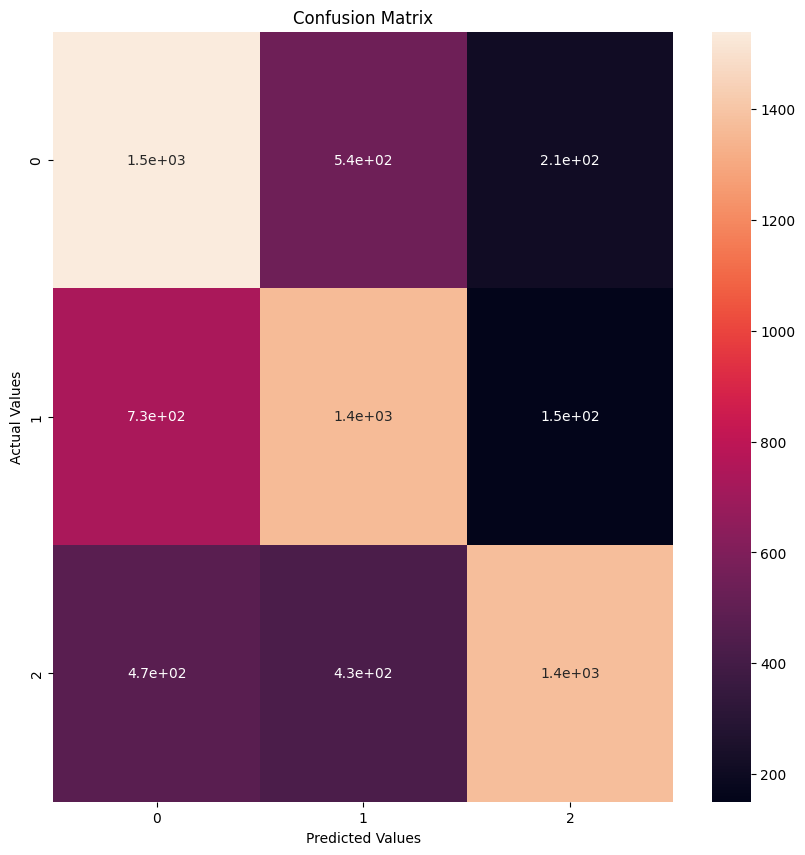


Accuracy: 0.6281561949500881
Balanced accuracy: 0.627954309254961
Precision: 0.6461051688808953
Recall: 0.627954309254961
F1 score: 0.6310949056145341
ROC AUC score: 0.8143521104369201


In [88]:
# Calculate and print the evaluation metrics

# Confusion Matrix set-up
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[0, 1, 2], 
                     columns=[0, 1, 2])
plt.figure(figsize=(10,10)) # Set matrix size
sns.heatmap(cm_df, annot=True) # Use seaborn to make coloured heatmap
plt.title('Confusion Matrix') # Provide a title
plt.ylabel('Actual Values') # Label columns
plt.xlabel('Predicted Values') # Label rows
plt.show()
print()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba_norm, multi_class='ovr'))